### Task 2: Develop Time Series Forecasting Models

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [4]:
# Fetch historical data from YFinance
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Fetch data for TSLA, BND, and SPY
start_date = '2015-01-01'
end_date = '2024-10-31'
tsla_data = fetch_data('TSLA', start_date, end_date)
bnd_data = fetch_data('BND', start_date, end_date)
spy_data = fetch_data('SPY', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Split data into training and testing sets

In [8]:
# Split data into training and testing sets
train_size_tsla = int(len(tsla_data) * 0.8)
train_tsla, test_tsla = tsla_data['Adj Close'][:train_size_tsla], tsla_data['Adj Close'][train_size_tsla:]


In [9]:
# Split data into training and testing sets
train_size_bnd = int(len(bnd_data) * 0.8)
train_bnd, test_bnd = bnd_data['Adj Close'][:train_size_bnd], bnd_data['Adj Close'][train_size_bnd:]


In [10]:
# Split data into training and testing sets
train_size_spy = int(len(spy_data) * 0.8)
train_spy, test_spy = spy_data['Adj Close'][:train_size_spy], spy_data['Adj Close'][train_size_spy:]


### Fit ARIMA model

In [14]:
# Fit ARIMA model Tsla
model_tsla = auto_arima(train_tsla, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(f"Best model parameters: {model_tsla.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=8.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=5.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 17.623 seconds
Best model parameters: (0, 1, 0)


In [15]:
# Fit ARIMA model Bnd
model_bnd = auto_arima(train_bnd, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(f"Best model parameters: {model_bnd.order}")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=21.92 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1146.513, Time=1.95 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=716.672, Time=1.98 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1144.513, Time=0.49 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=461.625, Time=2.93 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=249.734, Time=4.21 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=92.936, Time=5.08 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=39.705, Time=6.58 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-232.900, Time=36.37 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=32.08 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=49.90 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.65 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=15.77 sec

Best model:  ARIMA(5,2,1)(0,0,0)[0] intercept
Total fit time: 2

In [16]:
# Fit ARIMA model Spy
model_spy = auto_arima(train_spy, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(f"Best model parameters: {model_spy.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10342.044, Time=16.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10433.547, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10417.356, Time=1.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10419.090, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10433.150, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10416.088, Time=5.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10416.447, Time=5.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10342.816, Time=16.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10418.045, Time=20.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10415.884, Time=3.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10416.332, Time=12.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10417.216, Time=10.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10419.540, Time=18.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10341.913, Time=10.63 sec
 ARIMA(1,1,2

### Train the ARIMA model


In [17]:
# Train the ARIMA model Tsla
arima_model_tsla = ARIMA(train_tsla, order=model_tsla.order)
arima_model_fit = arima_model_tsla.fit()

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

In [18]:
# Train the ARIMA model Bnd
arima_model_bnd = ARIMA(train_bnd, order=model_bnd.order)
arima_model_fit = arima_model_bnd.fit()

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

In [19]:
# Train the ARIMA model Spy
arima_model_spy = ARIMA(train_spy, order=model_spy.order)
arima_model_fit = arima_model_spy.fit()

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

### Forecast future prices

##### Forecast future prices Tsla

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


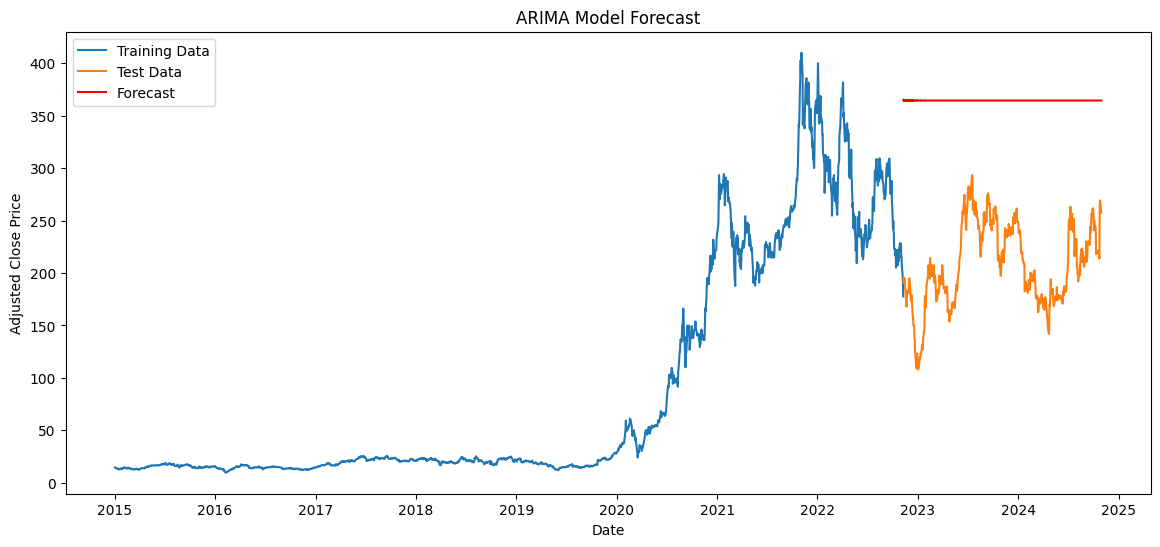

In [20]:
# Forecast future prices
forecast = arima_model_fit.forecast(steps=len(test_tsla))
plt.figure(figsize=(14, 6))
plt.plot(train_tsla.index, train_tsla, label='Training Data')
plt.plot(test_tsla.index, test_tsla, label='Test Data')
plt.plot(test_tsla.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

##### Forecast future prices Bnd

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


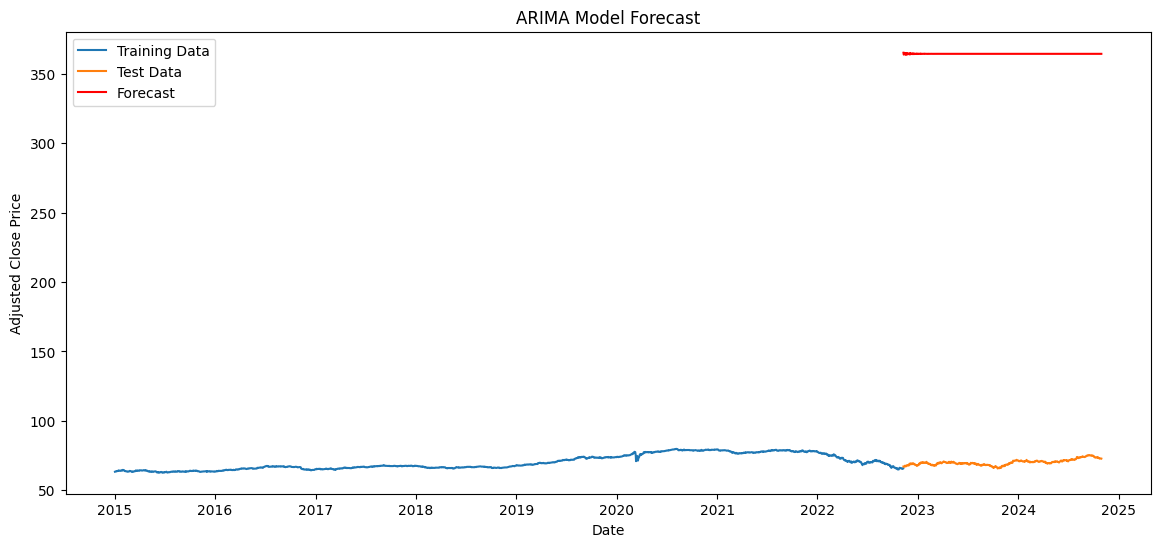

In [21]:
# Forecast future prices
forecast = arima_model_fit.forecast(steps=len(test_bnd))
plt.figure(figsize=(14, 6))
plt.plot(train_bnd.index, train_bnd, label='Training Data')
plt.plot(test_bnd.index, test_bnd, label='Test Data')
plt.plot(test_bnd.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

##### Forecast future prices spy

/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ayalk94/Documents/GitHub/Optimizing_Portfolio_Management_through_Advanced_Time_Series_Forecasting/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


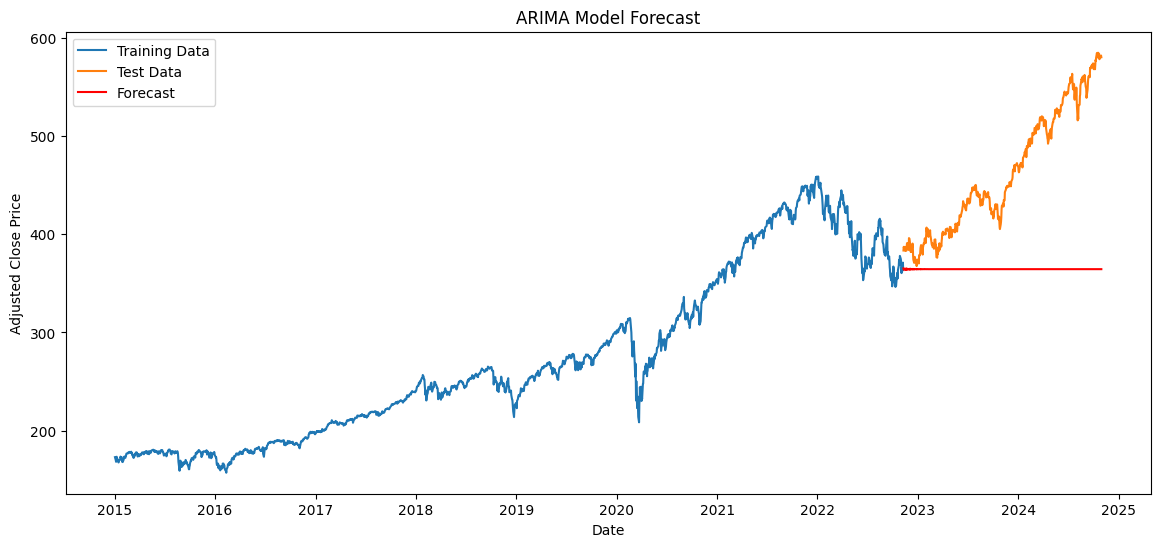

In [22]:
# Forecast future prices
forecast = arima_model_fit.forecast(steps=len(test_spy))
plt.figure(figsize=(14, 6))
plt.plot(train_spy.index, train_spy, label='Training Data')
plt.plot(test_spy.index, test_spy, label='Test Data')
plt.plot(test_spy.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### Evaluation metrics

#####  Evaluation metrics for Tsla

In [23]:
# Evaluation metrics
mae = mean_absolute_error(test_tsla, forecast)
rmse = np.sqrt(mean_squared_error(test_tsla, forecast))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 156.46656056018836
Root Mean Squared Error (RMSE): 161.16044236810882


#####  Evaluation metrics for bnd

In [24]:
# Evaluation metrics
mae = mean_absolute_error(test_bnd, forecast)
rmse = np.sqrt(mean_squared_error(test_bnd, forecast))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 294.27796937181535
Root Mean Squared Error (RMSE): 294.285133977261


#####  Evaluation metrics for spy

In [25]:
# Evaluation metrics
mae = mean_absolute_error(test_spy, forecast)
rmse = np.sqrt(mean_squared_error(test_spy, forecast))
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 98.63514047112085
Root Mean Squared Error (RMSE): 116.79212502252834
